# Selección de Factores

Correlaciones: relaciones lineales entre variables numéricas
- Relaciones lineales con SelectKbest
- Relaciones No lineales con SelectKbest

In [18]:
%matplotlib inline
#Lo más común es buscar relaciones lineales
#Importamos librerías básicas
import os
import pandas as pd #manipulación dataframes
import numpy as np #matrices y vectores
import matplotlib.pyplot as plt #gráficas
from ydata_profiling import ProfileReport
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif

input_path = os.path.join('..', 'input')
output_path = os.path.join('..', 'output')

In [6]:
#Cargamos los datos
data = pd.read_csv(os.path.join(output_path, 'descriptive_mining', 'final1_description_numeric.csv'))
data.head()

Desc_Cargo_AUXILIAR ADMINSTRATIVO  Desc_Cargo_AUXILIAR AMBIENTAL  \
0                                  0                              0   
1                                  0                              0   
2                                  0                              0   
3                                  0                              0   
4                                  0                              0   

   Desc_Cargo_AUXILIAR DE SERVICIOS GENERALES  Desc_Cargo_CADENERO I  \
0                                           0                      0   
1                                           0                      0   
2                                           0                      0   
3                                           0                      0   
4                                           0                      0   

   Desc_Cargo_CONDUCTOR DE VOLQUETA DAF  Desc_Cargo_CONTROLADOR VIAL  \
0                                     0                            0   
1                                     0                            0   
2                                     0                            0   
3                                     0                            0   
4                                     0                            0   

   Desc_Cargo_INGENIERO AUXILIAR  Desc_Cargo_INSPECTOR SST I  \
0                              0                           0   
1                              0                           0   
2                              0                           0   
3                              0                           0   
4                              0                           0   

   Desc_Cargo_OFICIAL I  Desc_Cargo_OFICIAL II  ...  houses_TP19_EE_E5  \
0                     1                      0  ...                0.0   
1                     0                      0  ...                0.0   
2                     1                      0  ...                0.0   
3                     1                      0  ...                0.0   
4                     0                      0  ...                0.0   

   houses_TP19_EE_E6  houses_TP15_1_OCU  houses_TP14_2_TIP  houses_TP9_2_USO  \
0                0.0           0.698113           0.000000          0.056604   
1                0.0           0.969231           0.538462          0.107692   
2                0.0           1.000000           0.000000          0.000000   
3                0.0           1.000000           0.000000          0.000000   
4                0.0           0.987654           0.679012          0.111111   

   houses_TP14_6_TIP  houses_TP15_2_OCU  houses_TP14_4_TIP  homes_TP27_PERSO  \
0                0.0                0.0                0.0            3.0000   
1                0.0                0.0                0.0            2.6250   
2                0.0                0.0                0.0            1.7500   
3                0.0                0.0                0.0            1.7500   
4                0.0                0.0                0.0            3.3125   

   causa_retiro  
0             1  
1             0  
2             1  
3             1  
4             1  

[5 rows x 111 columns]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Columns: 111 entries, Desc_Cargo_AUXILIAR ADMINSTRATIVO to causa_retiro
dtypes: float64(60), int64(51)
memory usage: 218.7 KB


In [ ]:
#este perfilado nos da mucha información mínima de cada una de las variables y saca alertas

profile_data=ProfileReport(data, minimal=True) # minimal=False
#Guardamos en html el perfilado de datos
profile_data.to_file(output_file=os.path.join('data_profiling', 'FactorSelectionCorrelation_profiling.html'))
profile_data#este perfilado nos da mucha información mínima de cada una de las variables y saca alertas

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 111/111 [00:00<00:00, 2318.83it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
# Correlaciones
correlaciones=data.corr()
correlaciones

Desc_Cargo_AUXILIAR ADMINSTRATIVO  \
Desc_Cargo_AUXILIAR ADMINSTRATIVO                                    1.000000   
Desc_Cargo_AUXILIAR AMBIENTAL                                       -0.005646   
Desc_Cargo_AUXILIAR DE SERVICIOS GENERALES                          -0.009818   
Desc_Cargo_CADENERO I                                               -0.005646   
Desc_Cargo_CONDUCTOR DE VOLQUETA DAF                                -0.020860   
...                                                                       ...   
houses_TP14_6_TIP                                                   -0.018982   
houses_TP15_2_OCU                                                    0.138091   
houses_TP14_4_TIP                                                   -0.008000   
homes_TP27_PERSO                                                     0.206505   
causa_retiro                                                         0.012179   

                                            Desc_Cargo_AUXILIAR AMBIENTAL  \
Desc_Cargo_AUXILIAR ADMINSTRATIVO                               -0.005646   
Desc_Cargo_AUXILIAR AMBIENTAL                                    1.000000   
Desc_Cargo_AUXILIAR DE SERVICIOS GENERALES                      -0.006928   
Desc_Cargo_CADENERO I                                           -0.003984   
Desc_Cargo_CONDUCTOR DE VOLQUETA DAF                            -0.014721   
...                                                                   ...   
houses_TP14_6_TIP                                               -0.013395   
houses_TP15_2_OCU                                                0.058330   
houses_TP14_4_TIP                                               -0.005646   
homes_TP27_PERSO                                                 0.039992   
causa_retiro                                                     0.072297   

                                            Desc_Cargo_AUXILIAR DE SERVICIOS GENERALES  \
Desc_Cargo_AUXILIAR ADMINSTRATIVO                                            -0.009818   
Desc_Cargo_AUXILIAR AMBIENTAL                                                -0.006928   
Desc_Cargo_AUXILIAR DE SERVICIOS GENERALES                                    1.000000   
Desc_Cargo_CADENERO I                                                        -0.006928   
Desc_Cargo_CONDUCTOR DE VOLQUETA DAF                                         -0.025600   
...                                                                                ...   
houses_TP14_6_TIP                                                             0.468478   
houses_TP15_2_OCU                                                            -0.034625   
houses_TP14_4_TIP                                                            -0.009818   
homes_TP27_PERSO                                                              0.191714   
causa_retiro                                                                  0.051872   

                                            Desc_Cargo_CADENERO I  \
Desc_Cargo_AUXILIAR ADMINSTRATIVO                       -0.005646   
Desc_Cargo_AUXILIAR AMBIENTAL                           -0.003984   
Desc_Cargo_AUXILIAR DE SERVICIOS GENERALES              -0.006928   
Desc_Cargo_CADENERO I                                    1.000000   
Desc_Cargo_CONDUCTOR DE VOLQUETA DAF                    -0.014721   
...                                                           ...   
houses_TP14_6_TIP                                       -0.013395   
houses_TP15_2_OCU                                       -0.019911   
houses_TP14_4_TIP                                       -0.005646   
homes_TP27_PERSO                                        -0.021654   
causa_retiro                                            -0.055107   

                                            Desc_Cargo_CONDUCTOR DE VOLQUETA DAF  \
Desc_Cargo_AUXILIAR ADMINSTRATIVO                                      -0.020860   
Desc_Cargo_AUXILIAR AMBIENTAL                                       

In [11]:
#Correlaciones con la variable de interés
cor_variable_interes=correlaciones.loc['causa_retiro']
cor_variable_interes.nlargest(20)

causa_retiro                    1.000000
PERSONAS_S                      0.172550
permanencia                     0.165698
persons_TP51POSTGR              0.152687
TP14_1_TIP                      0.133965
TP9_2_1_MI                      0.130923
persons_TP34_6_EDA              0.124290
TP9_3_5_NO                      0.117824
Desc_Cargo_OFICIAL I            0.114978
TP19_EE_2                       0.113591
Desc_Cargo_SOLDADOR I           0.105528
houses_TP14_4_TIP               0.102447
NMB_LC_CM_RAFAEL URIBE URIBE    0.102447
TP19_GAS_2                      0.087684
NMB_LC_CM_COMPARTIR             0.084525
TP9_2_9_MI                      0.081379
id_tipo_contrato_5.0            0.078089
anios                           0.074186
houses_TP9_2_USO                0.073696
salario_mes                     0.072890
Name: causa_retiro, dtype: float64

In [12]:
# Valor absoluto y ordenamiento descendente
#necesito sacar valor absoluto y me lo organizar descendentemente
ind= cor_variable_interes.abs().sort_values(ascending=False).index
cor_variable_interes[ind].head(20)

causa_retiro                    1.000000
PERSONAS_S                      0.172550
permanencia                     0.165698
persons_TP51POSTGR              0.152687
persons_TP34_8_EDA             -0.140283
TP14_1_TIP                      0.133965
TP9_2_1_MI                      0.130923
persons_TP34_6_EDA              0.124290
TP9_3_5_NO                      0.117824
persons_TP34_9_EDA             -0.116738
Desc_Cargo_OFICIAL I            0.114978
TP19_EE_2                       0.113591
Desc_Cargo_SOLDADOR I           0.105528
houses_TP14_4_TIP               0.102447
NMB_LC_CM_RAFAEL URIBE URIBE    0.102447
NMB_LC_CM_SUBA                 -0.098834
TP19_GAS_2                      0.087684
NMB_LC_CM_COMPARTIR             0.084525
TP9_2_9_MI                      0.081379
Desc_Cargo_INSPECTOR SST I     -0.078089
Name: causa_retiro, dtype: float64

In [23]:
X= data.drop('causa_retiro', axis=1) #axis es que saca porque ahí no esta la variable objetivo
Y= data['causa_retiro']

bestfeatures = SelectKBest(score_func=f_classif, k=2)
#regresiones lineales en clasificación y k son la cantidad de relavantes que quiero obtener
bestfeatures.fit(X, Y)
bestfeatures.get_feature_names_out()

array(['PERSONAS_S', 'permanencia'], dtype=object)

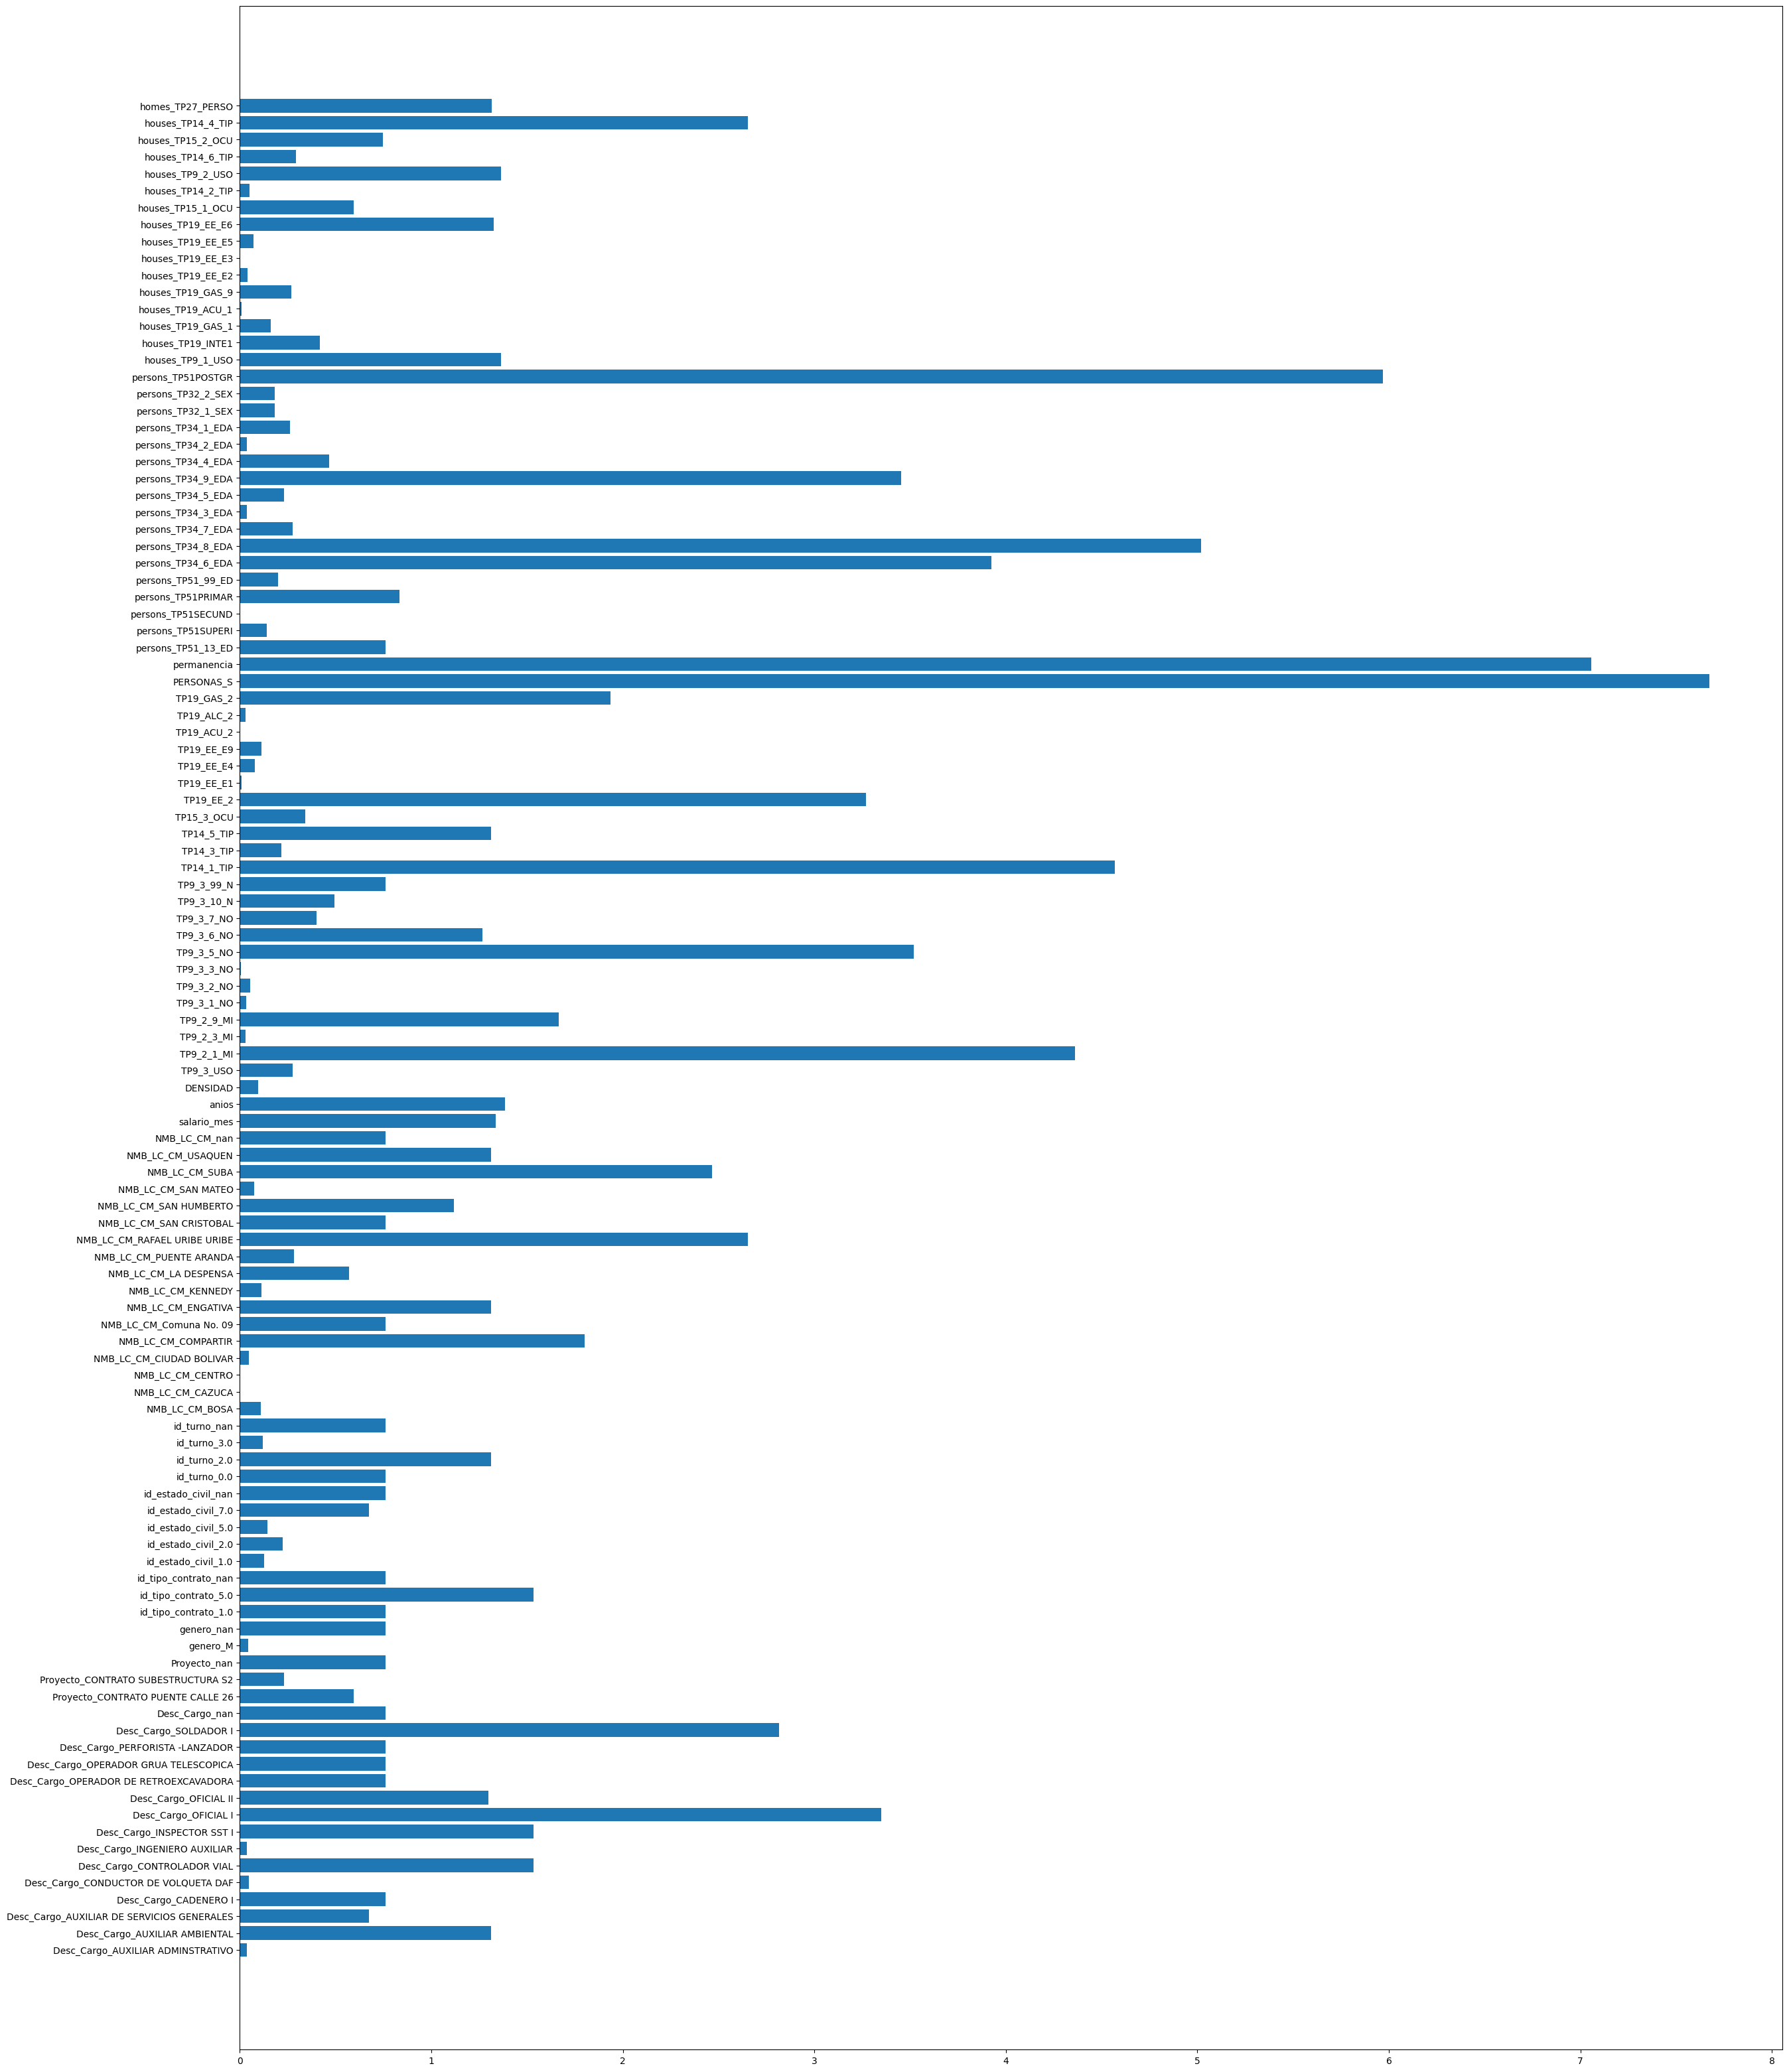

In [24]:
plt.figure(figsize=(30, 40))
plt.barh(y = X.columns, width=bestfeatures.scores_)
plt.savefig(os.path.join('models', "f_classif_plot.png"), dpi=300, bbox_inches="tight")

In [19]:
X= data.drop('causa_retiro', axis=1)
Y= data['causa_retiro']

bestfeatures = mutual_info_classif(X, Y, random_state=42)
#random_state es el valor de la semilla
bestfeatures

array([0.03486871, 0.        , 0.08110222, 0.        , 0.        ,
       0.00204623, 0.        , 0.00707442, 0.02059708, 0.00335836,
       0.        , 0.        , 0.05628712, 0.00433597, 0.03020584,
       0.        , 0.        , 0.0512298 , 0.00452135, 0.04039228,
       0.        , 0.        , 0.        , 0.01480246, 0.        ,
       0.        , 0.        , 0.02034713, 0.01961919, 0.        ,
       0.04520702, 0.00554592, 0.        , 0.        , 0.        ,
       0.00636507, 0.01775214, 0.        , 0.04860333, 0.        ,
       0.        , 0.        , 0.        , 0.01182323, 0.01482711,
       0.        , 0.00515388, 0.00080892, 0.        , 0.        ,
       0.02314979, 0.09937427, 0.01682061, 0.        , 0.        ,
       0.01670205, 0.        , 0.01074964, 0.        , 0.03364812,
       0.        , 0.        , 0.        , 0.04006982, 0.03835059,
       0.01936637, 0.        , 0.03024943, 0.0430722 , 0.0455319 ,
       0.        , 0.        , 0.07384187, 0.03906174, 0.     

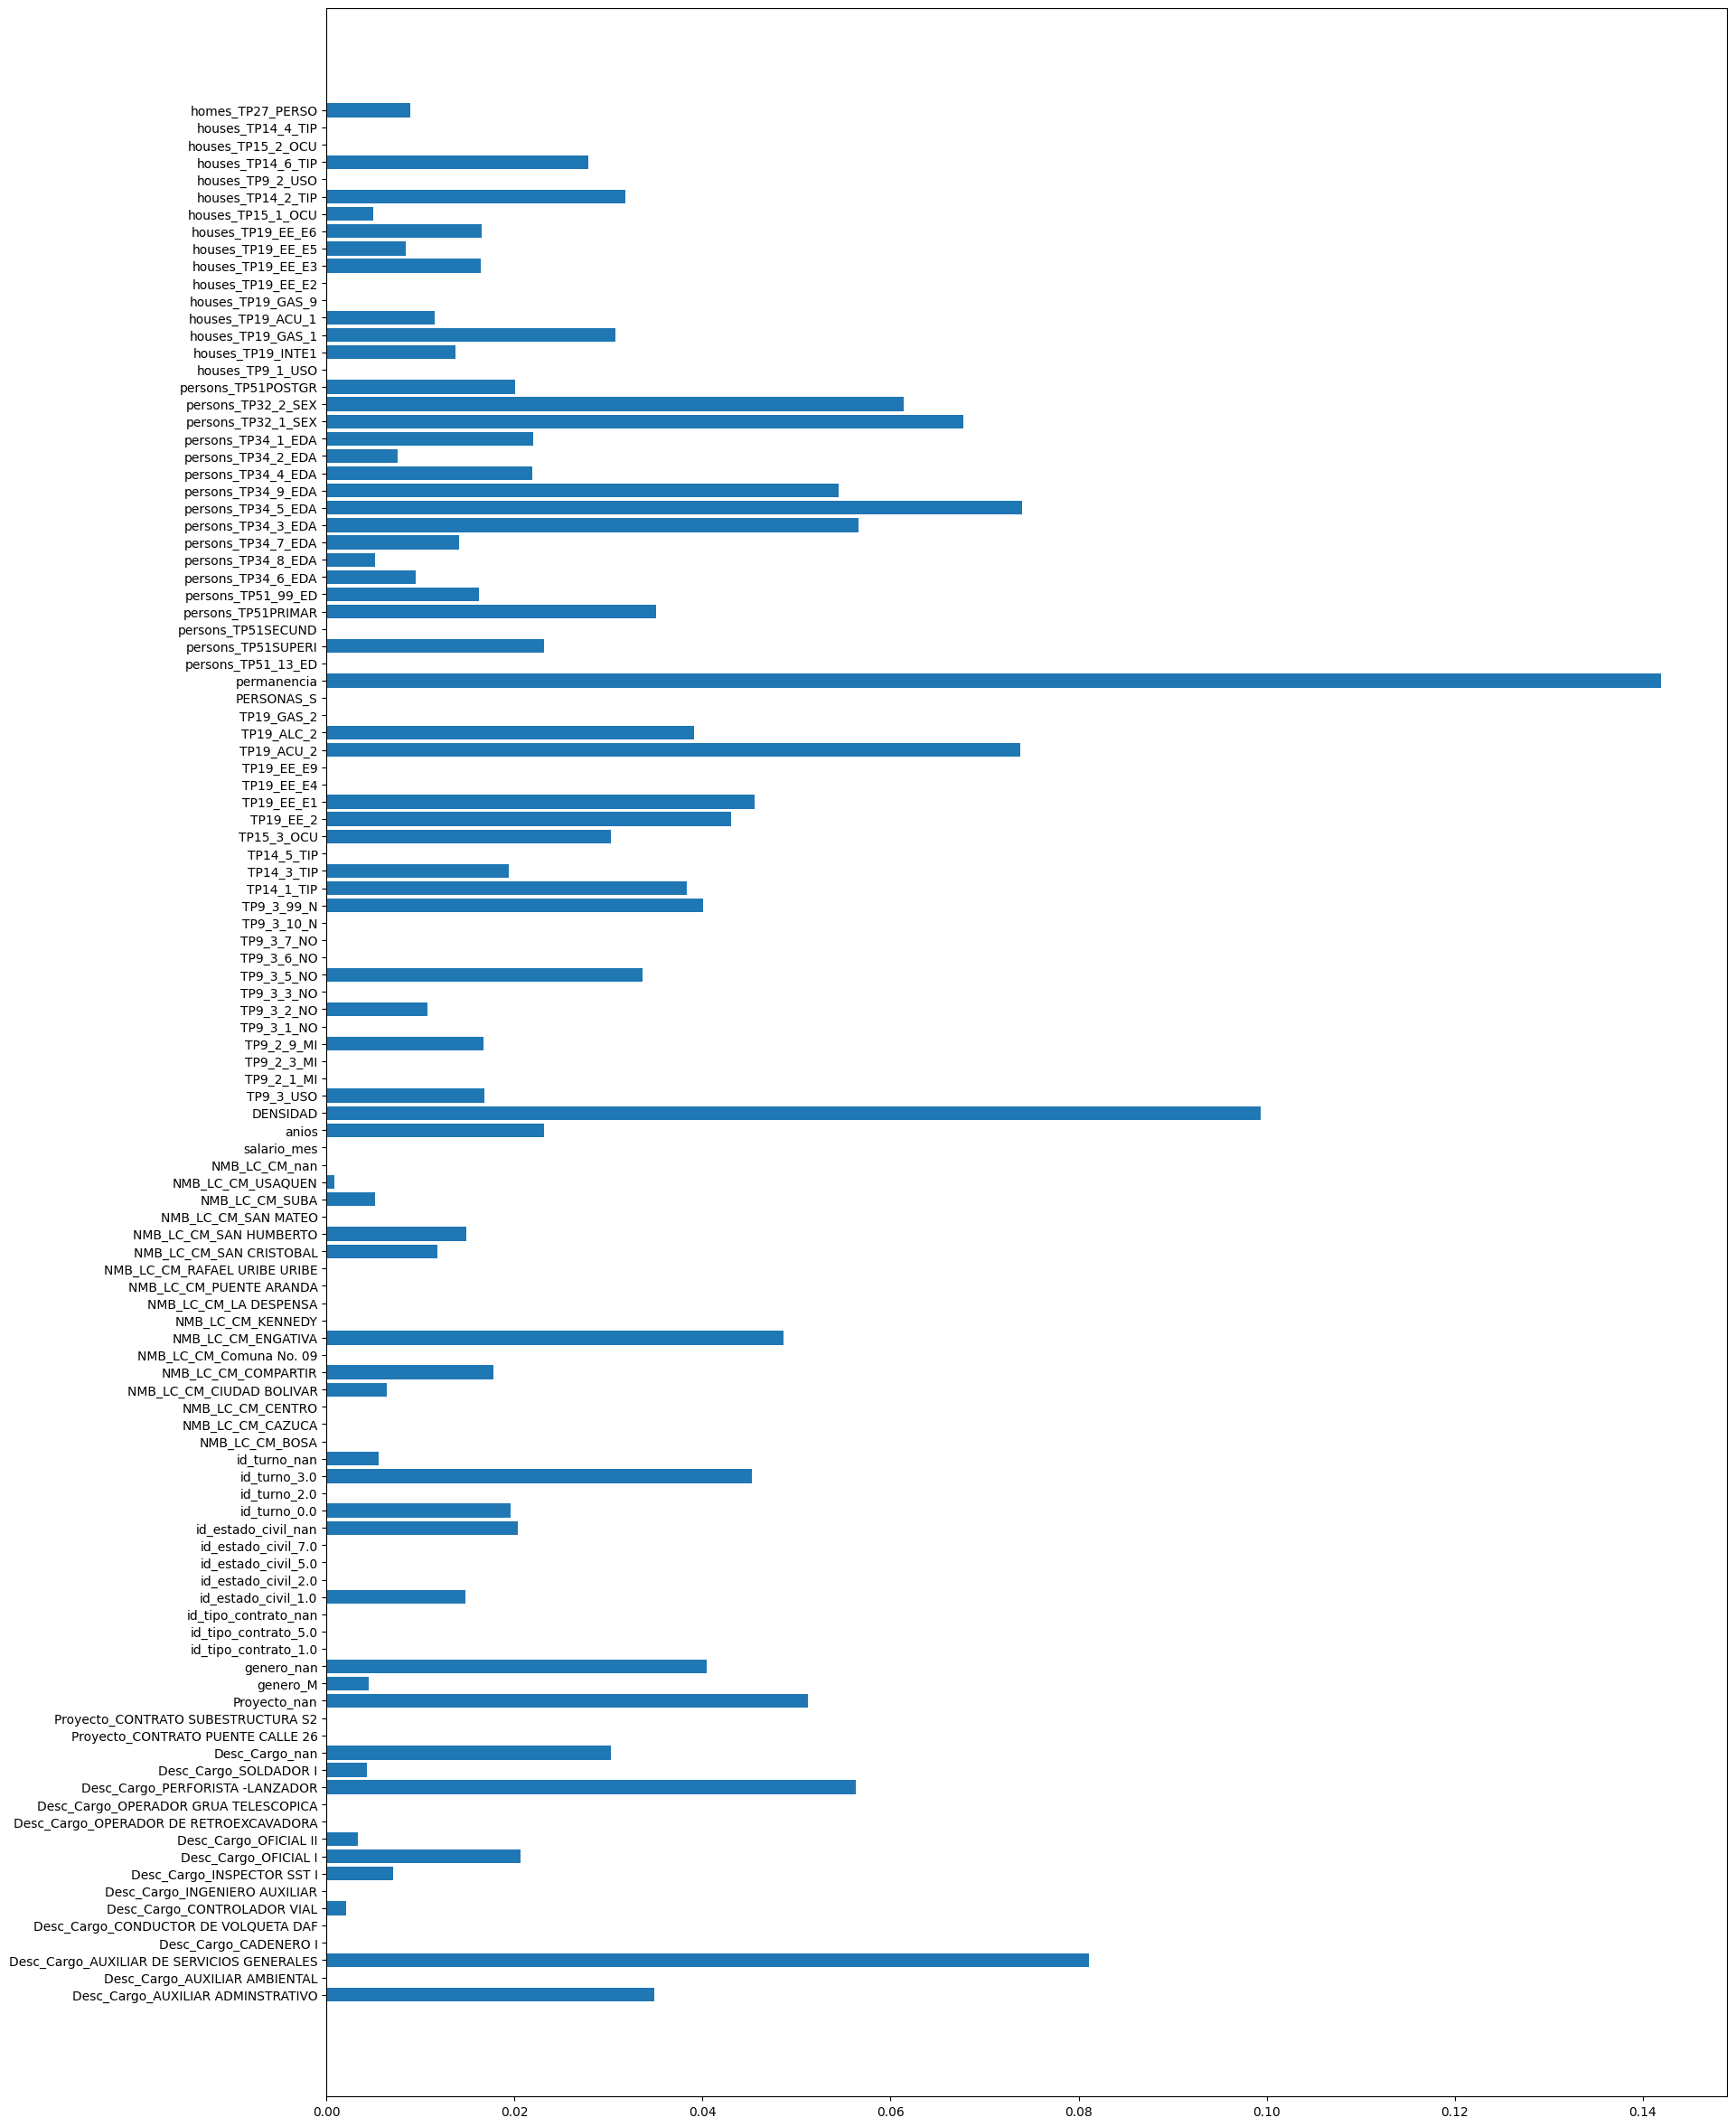

In [21]:
plt.figure(figsize=(20, 30))
plt.barh(y = X.columns, width=bestfeatures)
plt.savefig(os.path.join('models', "mutual_info_classif_plot.png"), dpi=300, bbox_inches="tight")